<h1> Doenças Coronárias </h1>

#Import 


In [41]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np 
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import matplotlib.gridspec as gridspec
# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, train
from sklearn.neural_network import MLPClassifier
# Métricas de avaliação dos modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

Importando os dados

In [73]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [44]:
df.shape

(303, 14)

In [45]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
df.describe(percentiles=[0.1, 0.25, 0.75, 0.9])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,42.000000,0.000000,0.000000,110.000000,188.000000,0.000000,0.000000,116.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
90%,66.000000,1.000000,2.000000,152.000000,308.800000,1.000000,1.000000,176.600000,1.000000,2.800000,2.000000,2.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Análise Exploratória dos Dados


Entender cada coluna no conjunto de dados e verificar cada variável. 

No conjunto de dados, checar se contém:
*   Valores Nulos;
*   Valores Duplicados;
*   Outliers. 

In [92]:
# Nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
senior      0
hchol       0
hbp         0
hbpm        0
dtype: int64

In [49]:
# Duplicados
df.duplicated().sum()

1

In [50]:
df = df.drop_duplicates()

Qual variável é discreta? Qual variável é contínua?





In [51]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

*   Discreta: cp, fbs, restecg, thal, slope, ca
*   Continua: age, trestbps, chol, thalach, olpeak
*   categórica: sex, exang  

Responder essa pergunta é importante para saber qual o melhor tipo de gráafico para cada coluna.

**Transformar as variávies continuas  in categorica and Discreta.**

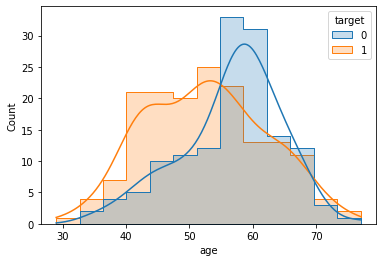

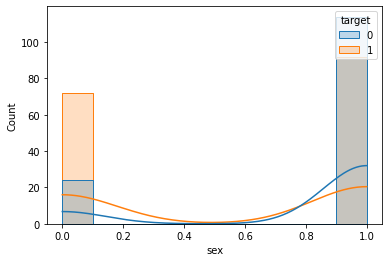

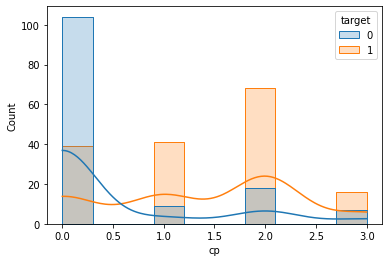

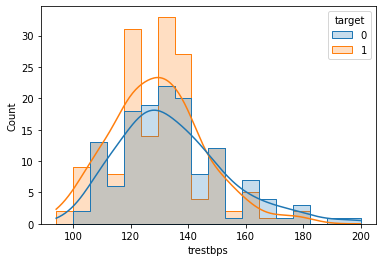

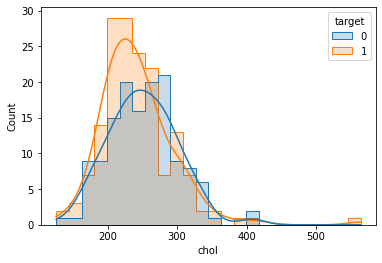

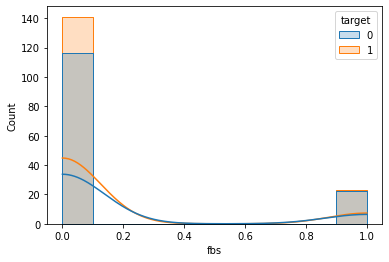

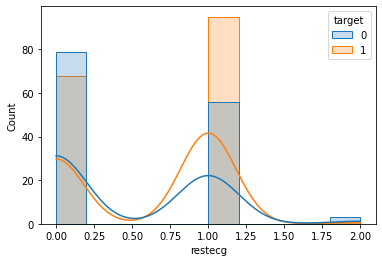

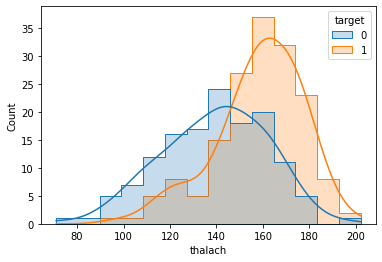

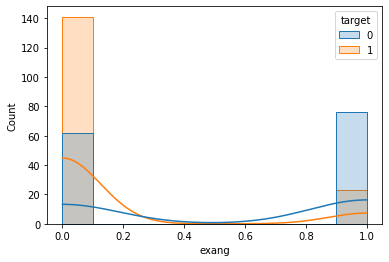

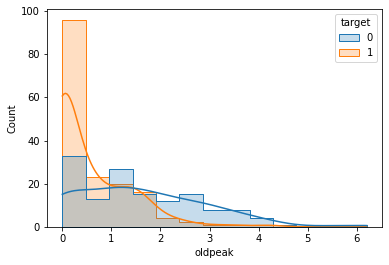

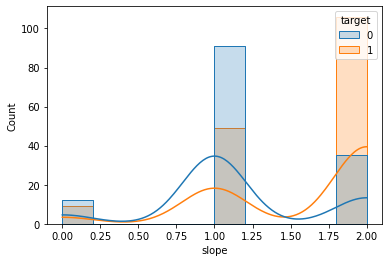

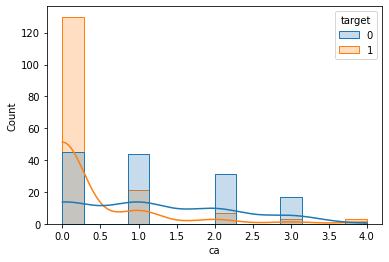

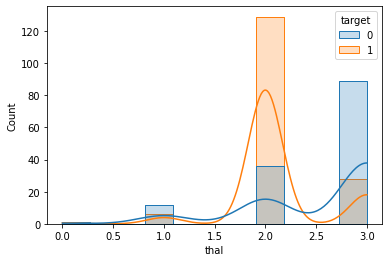

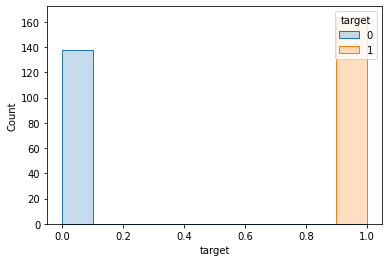

<Figure size 432x288 with 0 Axes>

In [52]:
for i in df.columns:
    sns.histplot(x=i,data=df, hue='target',kde=True, element="step")  
    plt.figure()

In [ ]:
# Verificando os quartis de distribuição. 
Q1=df[["age", "trestbps", "chol", "thalach", "oldpeak"]].quantile(0.25)
Q3=df[["age", "trestbps", "chol", "thalach", "oldpeak"]].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

In [ ]:
# Checar os outliers  nas variávies contínuas  
#age, trestbps, chol, thalach, olpeak

def draw_boxplots(df, selected_features):
  n = len(selected_features)
  fig = plt.figure(constrained_layout=True, figsize=(10, 20))
  gs = gridspec.GridSpec(int(n/5) + 1, 5, figure=fig)
  for i in range(n):
    k = int(i / 5)
    j = i % 5
    col = selected_features[i]
    ax = fig.add_subplot(gs[k, j])
    ax.set_title(col)
    ax.boxplot(df[col])

draw_boxplots(df, ["age", "trestbps","chol",  "thalach", "oldpeak"])

Na coluna de Age não tem outliers, mas nas outras colunas tem! Como tratar? Melhor tratar pela mediana.

In [90]:
median = np.median(df)

In [91]:
df["trestbps"] = df["trestbps"].mask(df["trestbps"] > 170, median)
median = df.loc[df["trestbps"]<170, "trestbps"].median()
df.loc[df.trestbps > 170, "trestbps"] = np.nan

df["chol"] = df["chol"].mask(df["chol"] > 350, median)
median = df.loc[df["chol"]<350, "chol"].median()
df.loc[df.chol > 350, "chol"] = np.nan

df["thalach"] = df["thalach"].mask(df["thalach"] < 80, median)
median = df.loc[df["thalach"]<80, "thalach"].median()
df.loc[df.thalach < 80, "thalach"] = np.nan

df["oldpeak"] = df["oldpeak"].mask(df["oldpeak"] > 4.0, median)
median = df.loc[df["oldpeak"]< 4.0, "oldpeak"].median()
df.loc[df.oldpeak > 4.0, "oldpeak"] = np.nan

In [ ]:
for i in df.columns:
    df[df.columns].boxplot(i)
    plt.figure()

## Data Understanding 

Entendendo os dados



*   cp = tipo de dor no peito;  
*   trestbps = pressão arterial;
*   chol = cholesterol (mg/dl);
*   fbs = Nível de açucar no sangue (diabetes);
*   restecg = eletreocardiograma resultados; 
*   thlach = heart rate archieved; 
*   exang = exercicios angina; 
*   oldpeak: Depressão de ST induzida por exercício em relação ao repouso;
*   slope: Tipo de inclinação do segmento ST de pico do exercício;
*   ca: número de vasos sanguínios ressaltados (coloridos por fluoroscopia);
*   thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable defect;
*   target: alvo; 1 = doente, 0 = não doente.



What features can ben created? Is better try to work with the continuous data and create an categorical data. 

*  "age", 
*  trestbps "chol", "thalach", "oldpeak"

In [58]:
df["sex"].groupby(df["target"]).mean()

target
0    0.826087
1    0.560976
Name: sex, dtype: float64

In [59]:
df.groupby(df["sex"]).mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,123.635417,240.520833,0.125000,0.572917,151.12500,0.229167,0.820000,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,127.427184,238.519417,0.160194,0.504854,149.65534,0.373786,1.099024,1.383495,0.796117,2.402913,0.446602


### Data Construction 

In [76]:
df["senior"] ='standard'
df.loc[df["age"] >= 55, "senior"]  ='senior'
df.loc[df["age"] <= 55, "senior"]  ='young'

In [77]:
df["hchol"] ='standard'
df.loc[df["chol"] >= 200, "hchol"]  ='high'
df.loc[df["chol"] < 200, "hchol"]  ='low'

In [78]:
df['hbp'] = df['trestbps'].apply(lambda x: 'high' if x >= 140.0  else 'standard')
df['hbpm'] = df['thalach'].apply(lambda x: 'high' if x >= 140.0  else 'standard')

Now the new features have been created we must to transform this data binary type

In [79]:
df['senior']= df['senior'].map({'young':0, 'senior':1})
df['hchol']= df['hchol'].map({'low':0, 'high':1})
df['hbp']= df['hbp'].map({'standard':0, 'high':1})
df['hbpm']= df['hbpm'].map({'standard':0, 'high':1})

### Data Tranformation

In [80]:
df['age'] = df['age'].astype(float)
df['cp'] = df['cp'].astype(float)
df['slope'] = df['slope'].astype(float)
df['thal'] = df['thal'].astype(float)

In [81]:
df['trestbps'] = df['trestbps'].astype(float)
df['chol'] = df['chol'].astype(float)
df['thalach'] = df['thalach'].astype(float)

In [82]:
df['senior']= df['senior'].astype(float)
df['hchol']= df['hchol'].astype(float)
df['hbp']= df['hbp'].astype(float)
df['hbpm']= df['hbpm'].astype(float)

In [83]:
df["exang"] = df['exang'].astype(float)
df["fbs"] = df['fbs'].astype(float)
df["sex"] = df['sex'].astype(float) 
df["restecg"] = df['restecg'].astype(float)

In [84]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target        int64
senior      float64
hchol       float64
hbp         float64
hbpm        float64
dtype: object

# Data Visualization

In this part of the code I will not create beautiful charts, but I want to check how the data in raw stage.  

In [28]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,senior,hchol,hbp,hbpm
age,1.000000,-0.094962,-0.063107,0.080058,0.100078,0.119492,-0.111590,-0.359790,0.093216,0.205428,-0.164124,0.302261,0.065317,-0.221476,0.818561,0.073980,0.274278,-0.225527
sex,-0.094962,1.000000,-0.051740,0.066246,-0.019952,0.046022,-0.060351,-0.029783,0.143460,0.118756,-0.032990,0.113060,0.211452,-0.283609,-0.056888,0.052352,0.015235,-0.042880
cp,-0.063107,-0.051740,1.000000,0.047923,-0.064213,0.096018,0.041561,0.269427,-0.392937,-0.128722,0.116854,-0.195356,-0.160370,0.432080,-0.080344,-0.025264,0.058032,0.221912
trestbps,0.080058,0.066246,0.047923,1.000000,-0.070963,-0.051629,-0.123792,-0.055069,-0.101356,-0.005217,0.016230,0.093060,-0.076952,-0.007578,0.108956,-0.004875,0.531359,-0.043077
chol,0.100078,-0.019952,-0.064213,-0.070963,1.000000,0.021300,-0.065975,-0.035916,0.071067,0.016115,0.016629,0.074568,0.047400,-0.123455,0.035090,0.686945,-0.020857,0.010928
fbs,0.119492,0.046022,0.096018,-0.051629,0.021300,1.000000,-0.083081,-0.017204,0.024729,0.017253,-0.058654,0.144935,-0.032752,-0.026826,0.102287,0.011724,0.018160,0.010720
restecg,-0.111590,-0.060351,0.041561,-0.123792,-0.065975,-0.083081,1.000000,0.062708,-0.068807,-0.056811,0.090402,-0.083112,-0.010473,0.134874,-0.132411,-0.080408,-0.087851,0.017240
thalach,-0.359790,-0.029783,0.269427,-0.055069,-0.035916,-0.017204,0.062708,1.000000,-0.392374,-0.337815,0.367332,-0.244400,-0.106816,0.391668,-0.281152,0.028351,-0.084605,0.801855
exang,0.093216,0.143460,-0.392937,-0.101356,0.071067,0.024729,-0.068807,-0.392374,1.000000,0.297539,-0.256106,0.125377,0.205826,-0.435601,0.091702,0.048410,0.017888,-0.337890
oldpeak,0.205428,0.118756,-0.128722,-0.005217,0.016115,0.017253,-0.056811,-0.337815,0.297539,1.000000,-0.555579,0.228124,0.190070,-0.426088,0.223248,-0.035243,0.140166,-0.274847


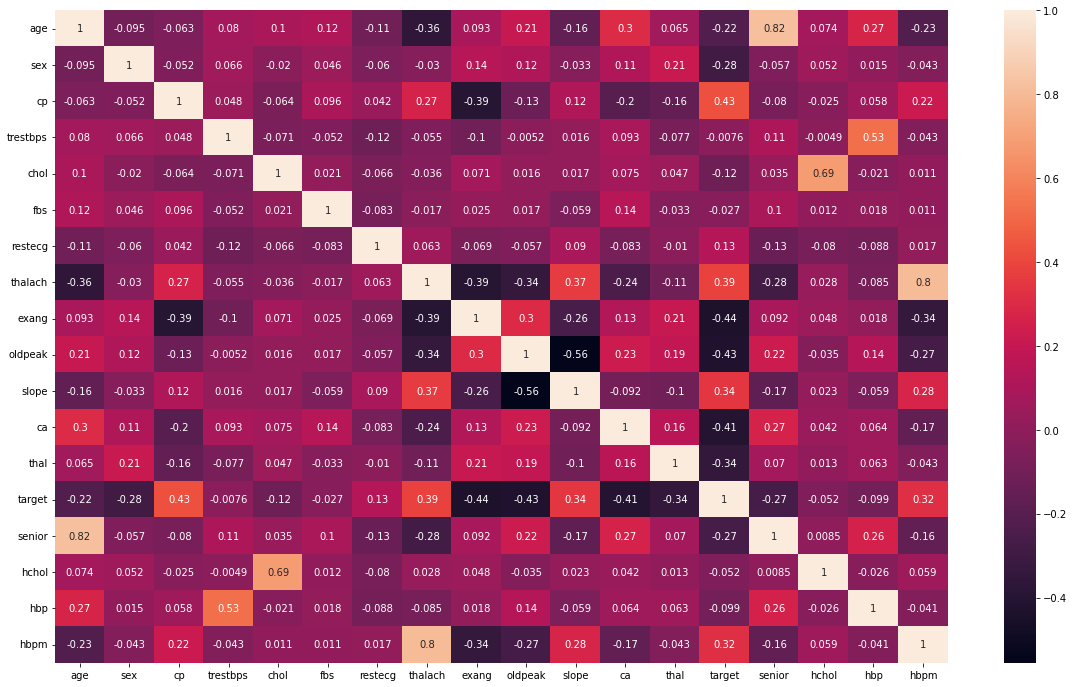

In [29]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_corr, annot = True)

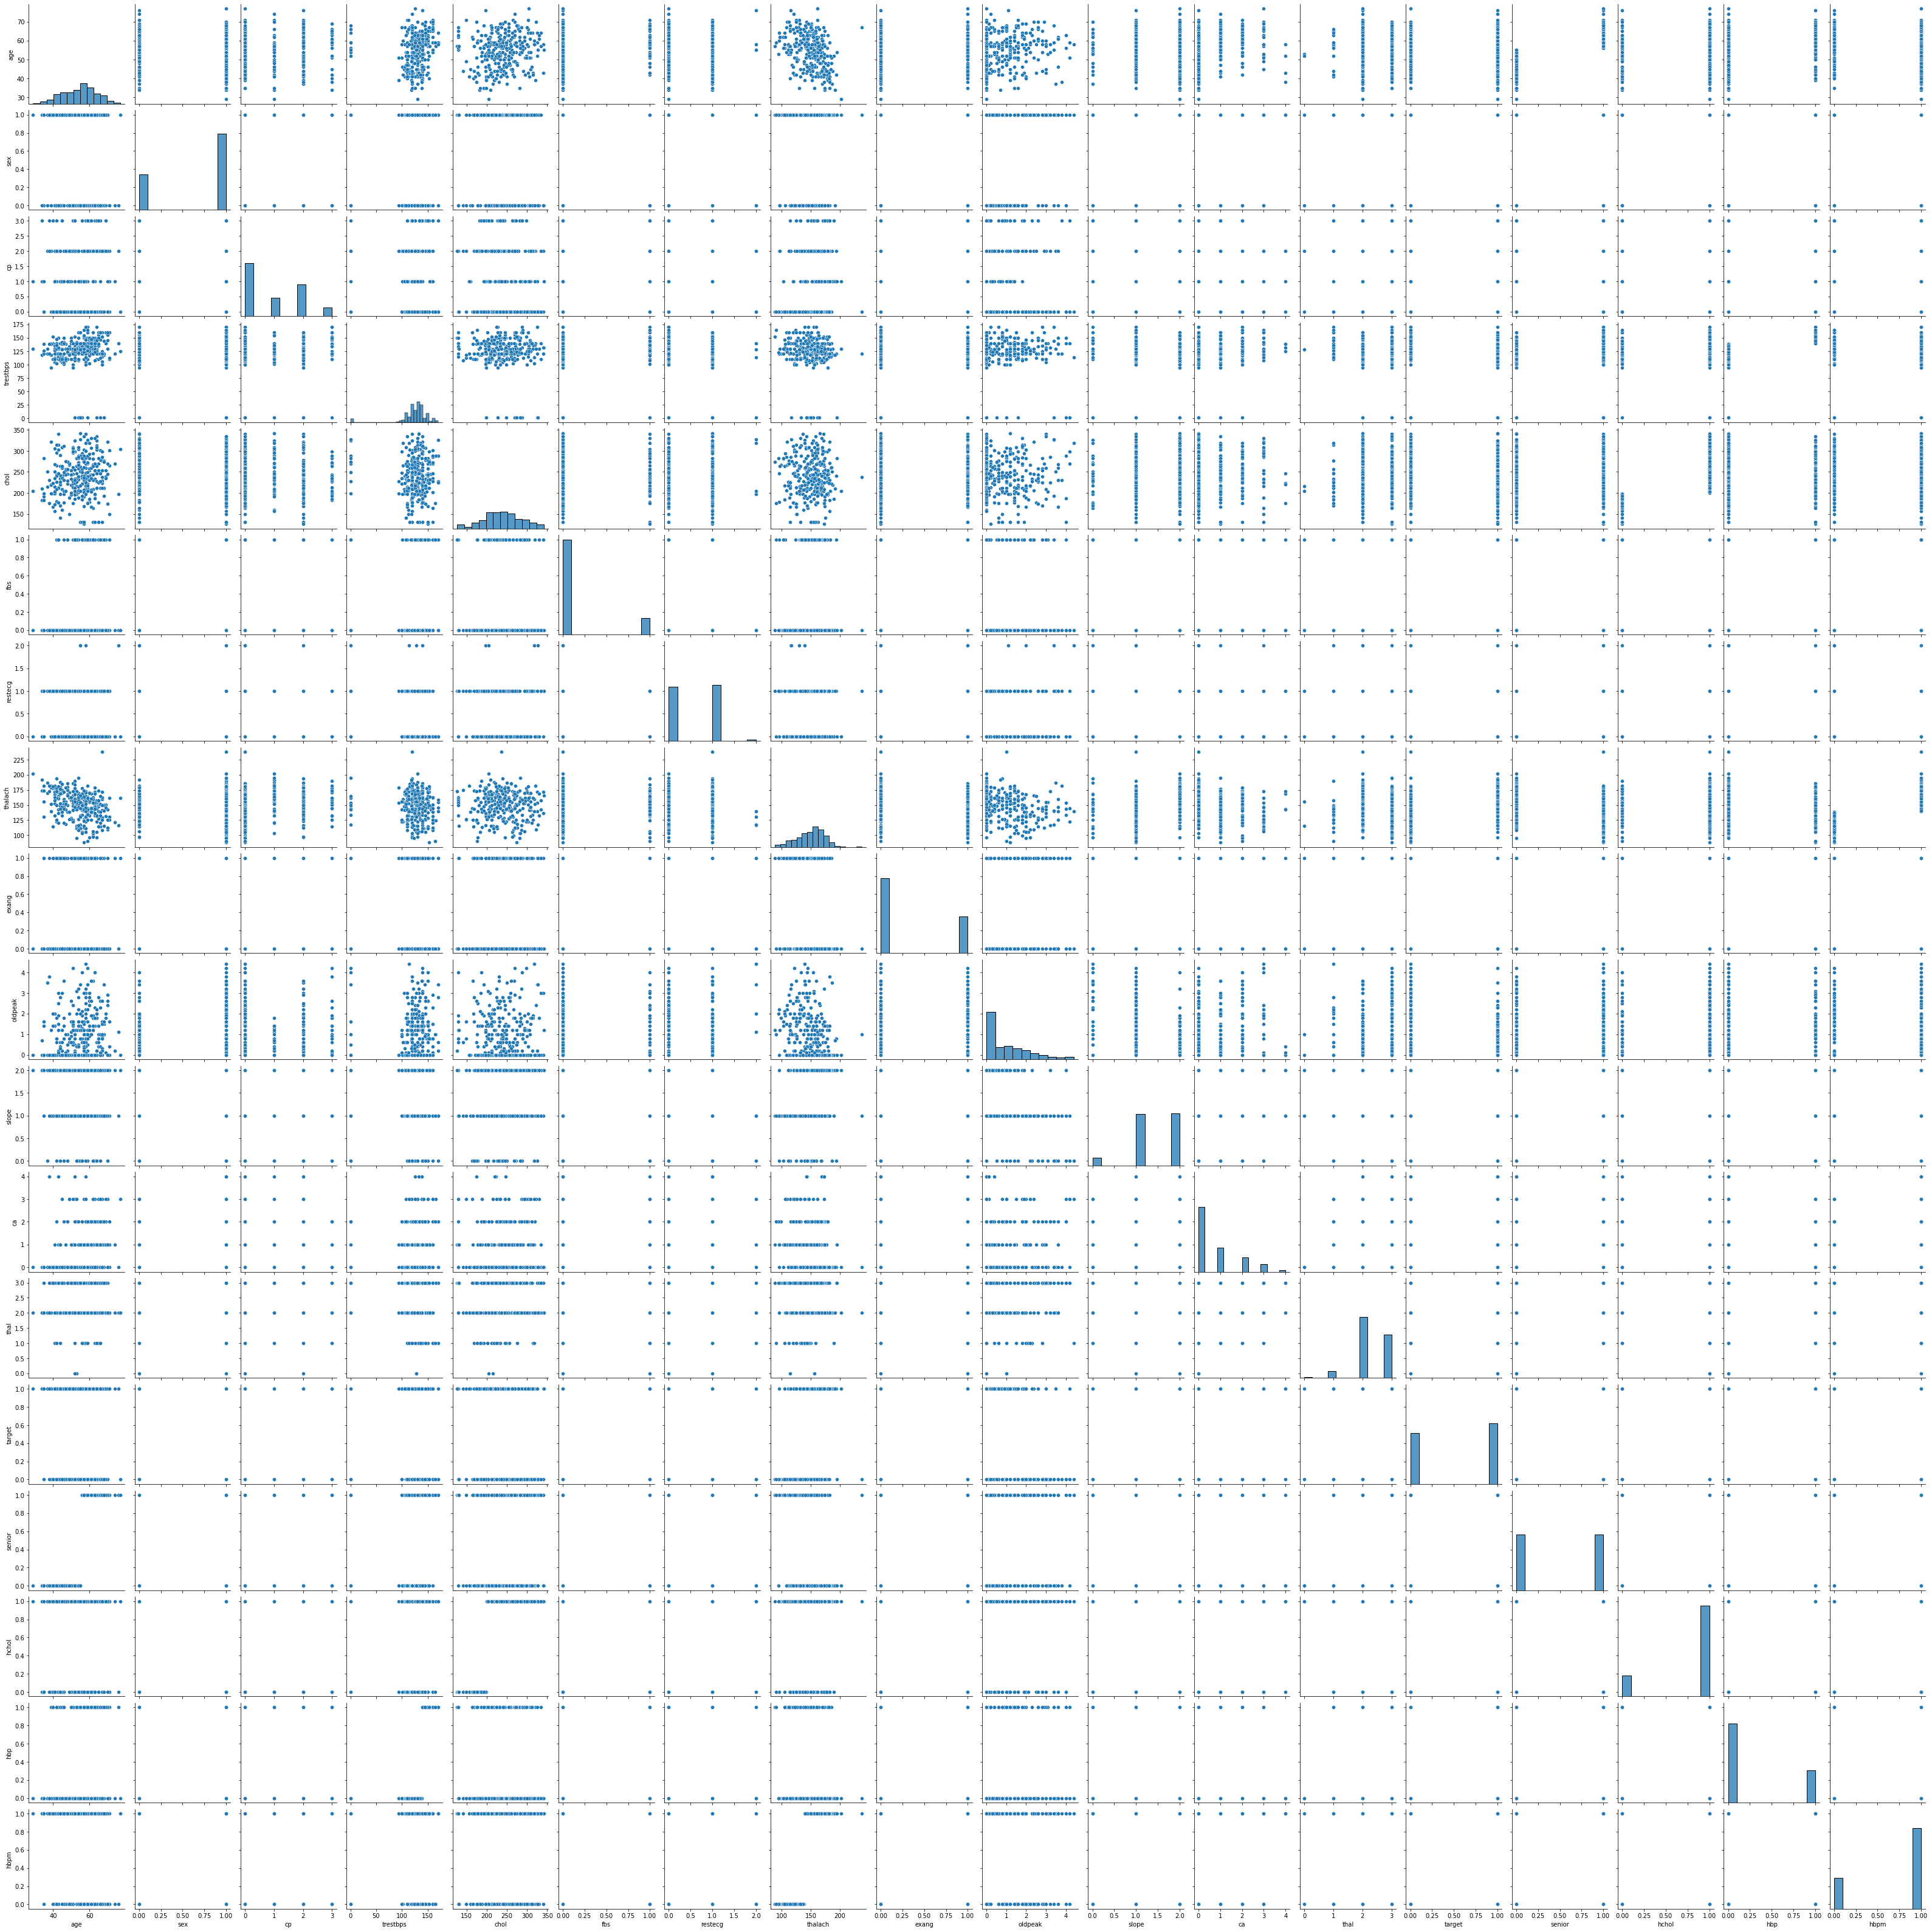

In [30]:
sns.pairplot(df)

# Machine Learning

Comece por modelos simples e depois aprimore a complexidade dos modelos. Então, comece por modelos como árvore de decisão até modelos de Deep Learning. 

### Modeling 

In [93]:
df = df.dropna()

In [107]:
#Pacient 
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42) 


models = {'Decision Tree':     DecisionTreeClassifier(criterion="entropy"),  
          'Extra Tree':        ExtraTreesClassifier(n_estimators=200, random_state=0),  
          'Random Forest':     RandomForestClassifier(bootstrap=  False, criterion= "entropy",max_depth= 3,max_features= 'log2',min_samples_split= 3,n_estimators= 50),   
          'XGBoost':           XGBClassifier(model_learning_rate=0.001, model_max_depth=3,model_n_estimators=100), 
          'AdaBoost':          AdaBoostClassifier(n_estimators=100, random_state=0),  
          'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),  
          'Redes Neurais':     MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)}  

for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall: {recall_score(y_test, y_pred)*100}%")
  print(f"F1: {f1_score(y_test, y_pred)*100}%")
  print('-----------------------------------')

Decision Tree
Acccuracy: 58.666666666666664%
Precision: 67.56756756756756%
Recall: 56.81818181818182%
F1: 61.728395061728406%
-----------------------------------
Extra Tree
Acccuracy: 85.33333333333334%
Precision: 86.66666666666667%
Recall: 88.63636363636364%
F1: 87.64044943820225%
-----------------------------------
Random Forest
Acccuracy: 86.66666666666667%
Precision: 85.41666666666666%
Recall: 93.18181818181817%
F1: 89.13043478260869%
-----------------------------------
XGBoost
Acccuracy: 80.0%
Precision: 82.22222222222221%
Recall: 84.0909090909091%
F1: 83.14606741573033%
-----------------------------------
AdaBoost
Acccuracy: 76.0%
Precision: 80.95238095238095%
Recall: 77.27272727272727%
F1: 79.06976744186046%
-----------------------------------
Gradient Boosting
Acccuracy: 74.66666666666667%
Precision: 79.06976744186046%
Recall: 77.27272727272727%
F1: 78.16091954022988%
-----------------------------------
Redes Neurais
Acccuracy: 70.66666666666667%
Precision: 84.375%
Recall: 61.3

Hiperparâmetros

In [104]:
# Verificando no XGBoost 
model = XGBClassifier()
param = dict(model_max_depth=[3,5,7], model_learning_rate=[0.001,0.01, 0.1], model_n_estimators=[100,500])

cv = GridSearchCV(model, param_grid=param, cv=10)
cv.fit(X_train, y_train)
test_pred = cv.predict(X_test)
cv.best_estimator_

XGBClassifier(model_learning_rate=0.001, model_max_depth=3,
              model_n_estimators=100)

In [95]:
# Verificando no Random Forest
params_grid = {'n_estimators':[100, 150, 200, 250, 500],
               'criterion':['gini', 'entropy'],
               'max_depth':[None, 1, 2, 3],
               'min_samples_split':[1, 2, 3],
               'max_features':['auto', 'sqrt', 'log2', 2, 3, 4, 5],
               'bootstrap':[True, False]}

RFC = RandomForestClassifier()

grid_search_rfc = GridSearchCV(RFC, param_grid=params_grid, cv=3, n_jobs=-1, verbose=2)

grid_search_rfc.fit(X_train, y_train)


Fitting 3 folds for each of 2016 candidates, totalling 6048 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


2016 fits failed out of a total of 6048.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1008 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/jobl

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2', 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [50, 100, 150, 200, 250, 500]},
             verbose=2)

In [103]:
grid_search_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 50}

In [96]:
clf_best_rfc = grid_search_rfc.best_estimator_
y_pred_rf = clf_best_rfc.predict(X_test)
print(round(f1_score(y_test, y_pred_rf, average='weighted')*100, 2))
print(classification_report(y_test, y_pred_rf))

81.1
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.81      0.89      0.85        44

    accuracy                           0.81        75
   macro avg       0.81      0.80      0.80        75
weighted avg       0.81      0.81      0.81        75



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



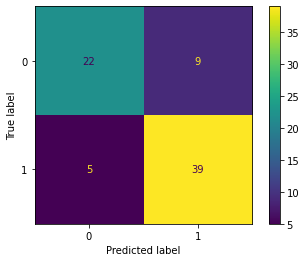

In [97]:
plot_confusion_matrix(clf_best_rfc, X_test, y_test, values_format='d')
plt.grid(False)
plt.show()

# Conclusão

O trabalho de feature engeneering não ajudou muito o modelo de classificação a performar melhor. É necessário reavaliar o comportamento das variáveis em relação ao target.  

\



